<a href="https://colab.research.google.com/github/boropx999/hello-world/blob/main/Face_detection_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential,preprocessing
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount = True)

Mounted at /content/gdrive


In [ ]:
%cd "gdrive/MyDrive/CNN"

/content/gdrive/MyDrive/CNN


In [ ]:
%ls

checkpoint.h5  Final.h5  test/  training/  validation/


In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(128,(3,3),input_shape=(256,256,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation ='softmax'))
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      36896     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 123008)            0         
                                                                 
 dense (Dense)               (None, 128)               1

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/CNN/training',
                                                 target_size = (256,256),
                                                 batch_size = 32,
                                                 class_mode =  'categorical')

Found 90 images belonging to 3 classes.


In [ ]:
test_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/CNN/test',
                                                 target_size = (256,256),
                                                 batch_size = 32,
                                                 class_mode =  'categorical')

Found 57 images belonging to 3 classes.


In [ ]:
#from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
#callbacks = [EarlyStopping(monitor = 'var_loss', patience = 10),ModelCheckpoint('checkpoint.h5',save_best_only = True)]

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(training_set,epochs = 20,validation_data=test_set,verbose = 1)

Epoch 1/20
3/3 [==============================] - 9s 2s/step - loss: 2.3898 - accuracy: 0.4556 - val_loss: 1.8826 - val_accuracy: 0.5439
Epoch 2/20
3/3 [==============================] - 3s 963ms/step - loss: 1.4119 - accuracy: 0.4444 - val_loss: 1.0443 - val_accuracy: 0.3509
Epoch 3/20
3/3 [==============================] - 3s 935ms/step - loss: 0.9724 - accuracy: 0.6111 - val_loss: 0.7974 - val_accuracy: 0.6140
Epoch 4/20
3/3 [==============================] - 3s 1s/step - loss: 1.0213 - accuracy: 0.5111 - val_loss: 0.9495 - val_accuracy: 0.4386
Epoch 5/20
3/3 [==============================] - 2s 939ms/step - loss: 0.8093 - accuracy: 0.5556 - val_loss: 0.6689 - val_accuracy: 0.6667
Epoch 6/20
3/3 [==============================] - 2s 978ms/step - loss: 0.6507 - accuracy: 0.7111 - val_loss: 0.4818 - val_accuracy: 0.7368
Epoch 7/20
3/3 [==============================] - 2s 985ms/step - loss: 0.3922 - accuracy: 0.8000 - val_loss: 0.6229 - val_accuracy: 0.6667
Epoch 8/20
3/3 [==========

In [ ]:
from keras import models
model.save('Final.h5')
model_CNN=models.load_model('Final.h5')

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image


[0]


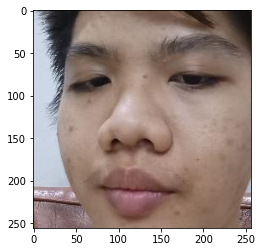

In [ ]:
test_image = image.load_img('/content/gdrive/MyDrive/CNN/validation/bao/bao_50.jpg')
img = image.img_to_array(test_image)
img = img.reshape(1,256,256,3)
img = img.astype('float32')
img = img/255
kqua = np.argmax(model_CNN.predict(img),axis=1)
print(kqua)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/gdrive/MyDrive/CNN/validation/bao/bao_50.jpg')
imgplot = plt.imshow(img)
plt.show()

[1]


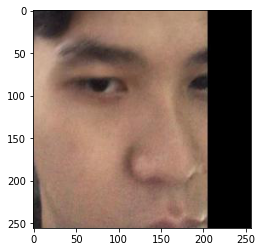

In [ ]:
test_image = image.load_img('/content/gdrive/MyDrive/CNN/validation/ngoc/ngoc_50.jpg')
img = image.img_to_array(test_image)
img = img.reshape(1,256,256,3)
img = img.astype('float32')
img = img/255
kqua = np.argmax(model_CNN.predict(img),axis=1)
print(kqua)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/gdrive/MyDrive/CNN/validation/ngoc/ngoc_50.jpg')
imgplot = plt.imshow(img)
plt.show()

[2]


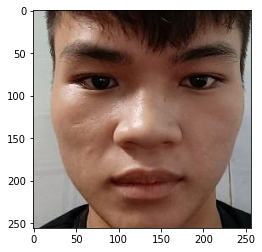

In [ ]:
test_image = image.load_img('/content/gdrive/MyDrive/CNN/validation/nhat/nhat_50.jpg')
img = image.img_to_array(test_image)
img = img.reshape(1,256,256,3)
img = img.astype('float32')
img = img/255
kqua = np.argmax(model_CNN.predict(img),axis=1)
print(kqua)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/gdrive/MyDrive/CNN/validation/nhat/nhat_50.jpg')
imgplot = plt.imshow(img)
plt.show()

[0]


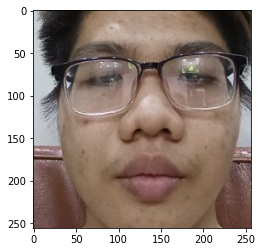

In [ ]:
test_image = image.load_img('/content/gdrive/MyDrive/CNN/validation/bao/test.jpg')
img = image.img_to_array(test_image)
img = img.reshape(1,256,256,3)
img = img.astype('float32')
img = img/255
kqua = np.argmax(model_CNN.predict(img),axis=1)
print(kqua)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/gdrive/MyDrive/CNN/validation/bao/test.jpg')
imgplot = plt.imshow(img)
plt.show()